# Simple Linear Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv(r"C:\Users\Lenovo\Downloads\Salary_Data.csv")
dataset


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
dataset.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [6]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
x = dataset.iloc[:, :-1].values

y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)
x_train, x_test, y_test

(array([[ 4.1],
        [ 9.6],
        [ 4. ],
        [ 1.3],
        [ 6. ],
        [ 4.5],
        [ 5.9],
        [ 3. ],
        [ 4. ],
        [ 8.2],
        [ 8.7],
        [10.3],
        [ 7.9],
        [ 3.9],
        [ 9.5],
        [10.5],
        [ 3.2],
        [ 9. ],
        [ 5.1],
        [ 5.3],
        [ 1.1],
        [ 4.9],
        [ 2.2],
        [ 3.7]]),
 array([[6.8],
        [3.2],
        [2.9],
        [1.5],
        [2. ],
        [7.1]]),
 array([91738., 54445., 56642., 37731., 43525., 98273.]))

## Training the Simple Linear Regression model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

## Predicting the Test set results

In [12]:
y_pred = regressor.predict(x_test)
y_pred


array([89715.76498848, 56031.05821174, 53223.99931368, 40124.39112273,
       44802.8226195 , 92522.82388655])

In [13]:
y_test

array([91738., 54445., 56642., 37731., 43525., 98273.])

In [14]:
x_test

array([[6.8],
       [3.2],
       [2.9],
       [1.5],
       [2. ],
       [7.1]])

In [15]:
diff=(y_pred-y_test)
diff


array([-2022.23501152,  1586.05821174, -3418.00068632,  2393.39112273,
        1277.8226195 , -5750.17611345])

In [16]:
pd.DataFrame(np.c_[y_test, y_pred, diff],columns=["Actual_value", "Predicted_value","Diff"])

,Actual_value,Predicted_value,Diff
0,91738.0,89715.764988,-2022.235012
1,54445.0,56031.058212,1586.058212
2,56642.0,53223.999314,-3418.000686
3,37731.0,40124.391123,2393.391123
4,43525.0,44802.822619,1277.822619
5,98273.0,92522.823887,-5750.176113


# Accuracy Measure

In [17]:
print("Train Accuracy:", regressor.score(x_train,y_train))
print("Test Accuracy:", regressor.score(x_test,y_pred))


Train Accuracy: 0.9494673013344644
Test Accuracy: 1.0


## Visualising the Training set results

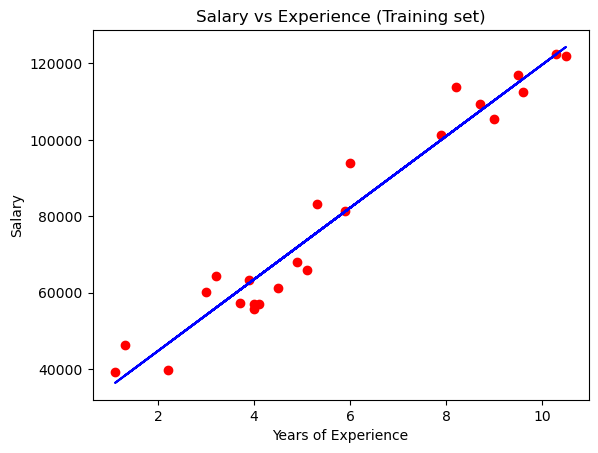

In [18]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

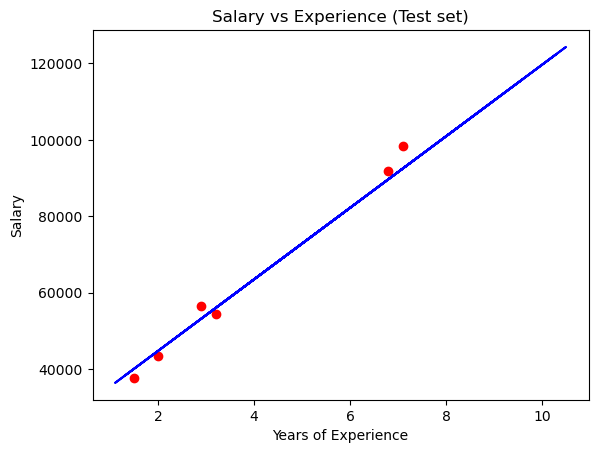

In [19]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the predicted value

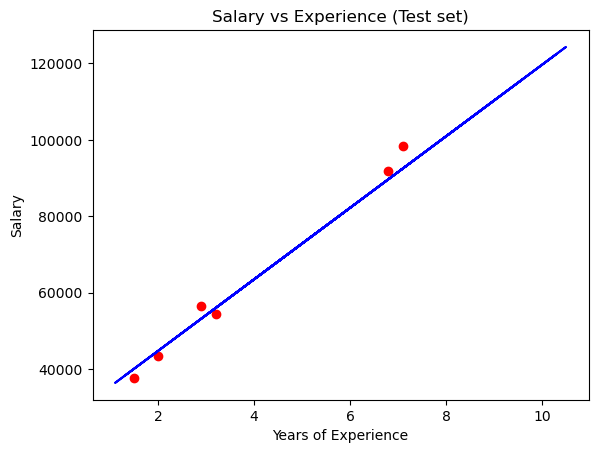

In [20]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()